In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset

df = pd.read_csv('user_album_mood_data.csv')

In [5]:
df

,user_id,mood,genre,album,artist
0,4,happy,indie,Blues in the Night,Chopin
1,2,sad,classical,Symphony No. 5,Sunny Days
2,3,happy,pop,Live Free,Pop Star
3,5,happy,rock,Symphony No. 5,The Rainmakers
4,1,sad,pop,Dance Like Nobody's Watching,The Rainmakers
5,5,relaxed,jazz,Lost Dreams,Sunny Days
6,2,happy,classical,Blues in the Night,Pop Star
7,3,sad,jazz,Symphony No. 5,The Freedom Fighters
8,5,sad,rock,Smooth Jazz Nights,The Rainmakers
9,5,relaxed,classical,Nocturnes,The Rainmakers


In [6]:
df.info

<bound method DataFrame.info of     user_id     mood      genre                         album  \
0         4    happy      indie            Blues in the Night   
1         2      sad  classical                Symphony No. 5   
2         3    happy        pop                     Live Free   
3         5    happy       rock                Symphony No. 5   
4         1      sad        pop  Dance Like Nobody's Watching   
5         5  relaxed       jazz                   Lost Dreams   
6         2    happy  classical            Blues in the Night   
7         3      sad       jazz                Symphony No. 5   
8         5      sad       rock            Smooth Jazz Nights   
9         5  relaxed  classical                     Nocturnes   
10        2    happy      blues            Smooth Jazz Nights   
11        2      sad  classical                  Summer Vibes   
12        2  relaxed  classical                  Summer Vibes   
13        4  relaxed      blues                   Lost Dre

In [7]:
df.shape

(20, 5)

In [6]:
df.describe

<bound method NDFrame.describe of     user_id     mood      genre                         album  \
0         4    happy      indie            Blues in the Night   
1         2      sad  classical                Symphony No. 5   
2         3    happy        pop                     Live Free   
3         5    happy       rock                Symphony No. 5   
4         1      sad        pop  Dance Like Nobody's Watching   
5         5  relaxed       jazz                   Lost Dreams   
6         2    happy  classical            Blues in the Night   
7         3      sad       jazz                Symphony No. 5   
8         5      sad       rock            Smooth Jazz Nights   
9         5  relaxed  classical                     Nocturnes   
10        2    happy      blues            Smooth Jazz Nights   
11        2      sad  classical                  Summer Vibes   
12        2  relaxed  classical                  Summer Vibes   
13        4  relaxed      blues                   Lost D

In [7]:
df.dtypes

user_id     int64
mood       object
genre      object
album      object
artist     object
dtype: object

In [8]:
df.isnull().sum()

user_id    0
mood       0
genre      0
album      0
artist     0
dtype: int64

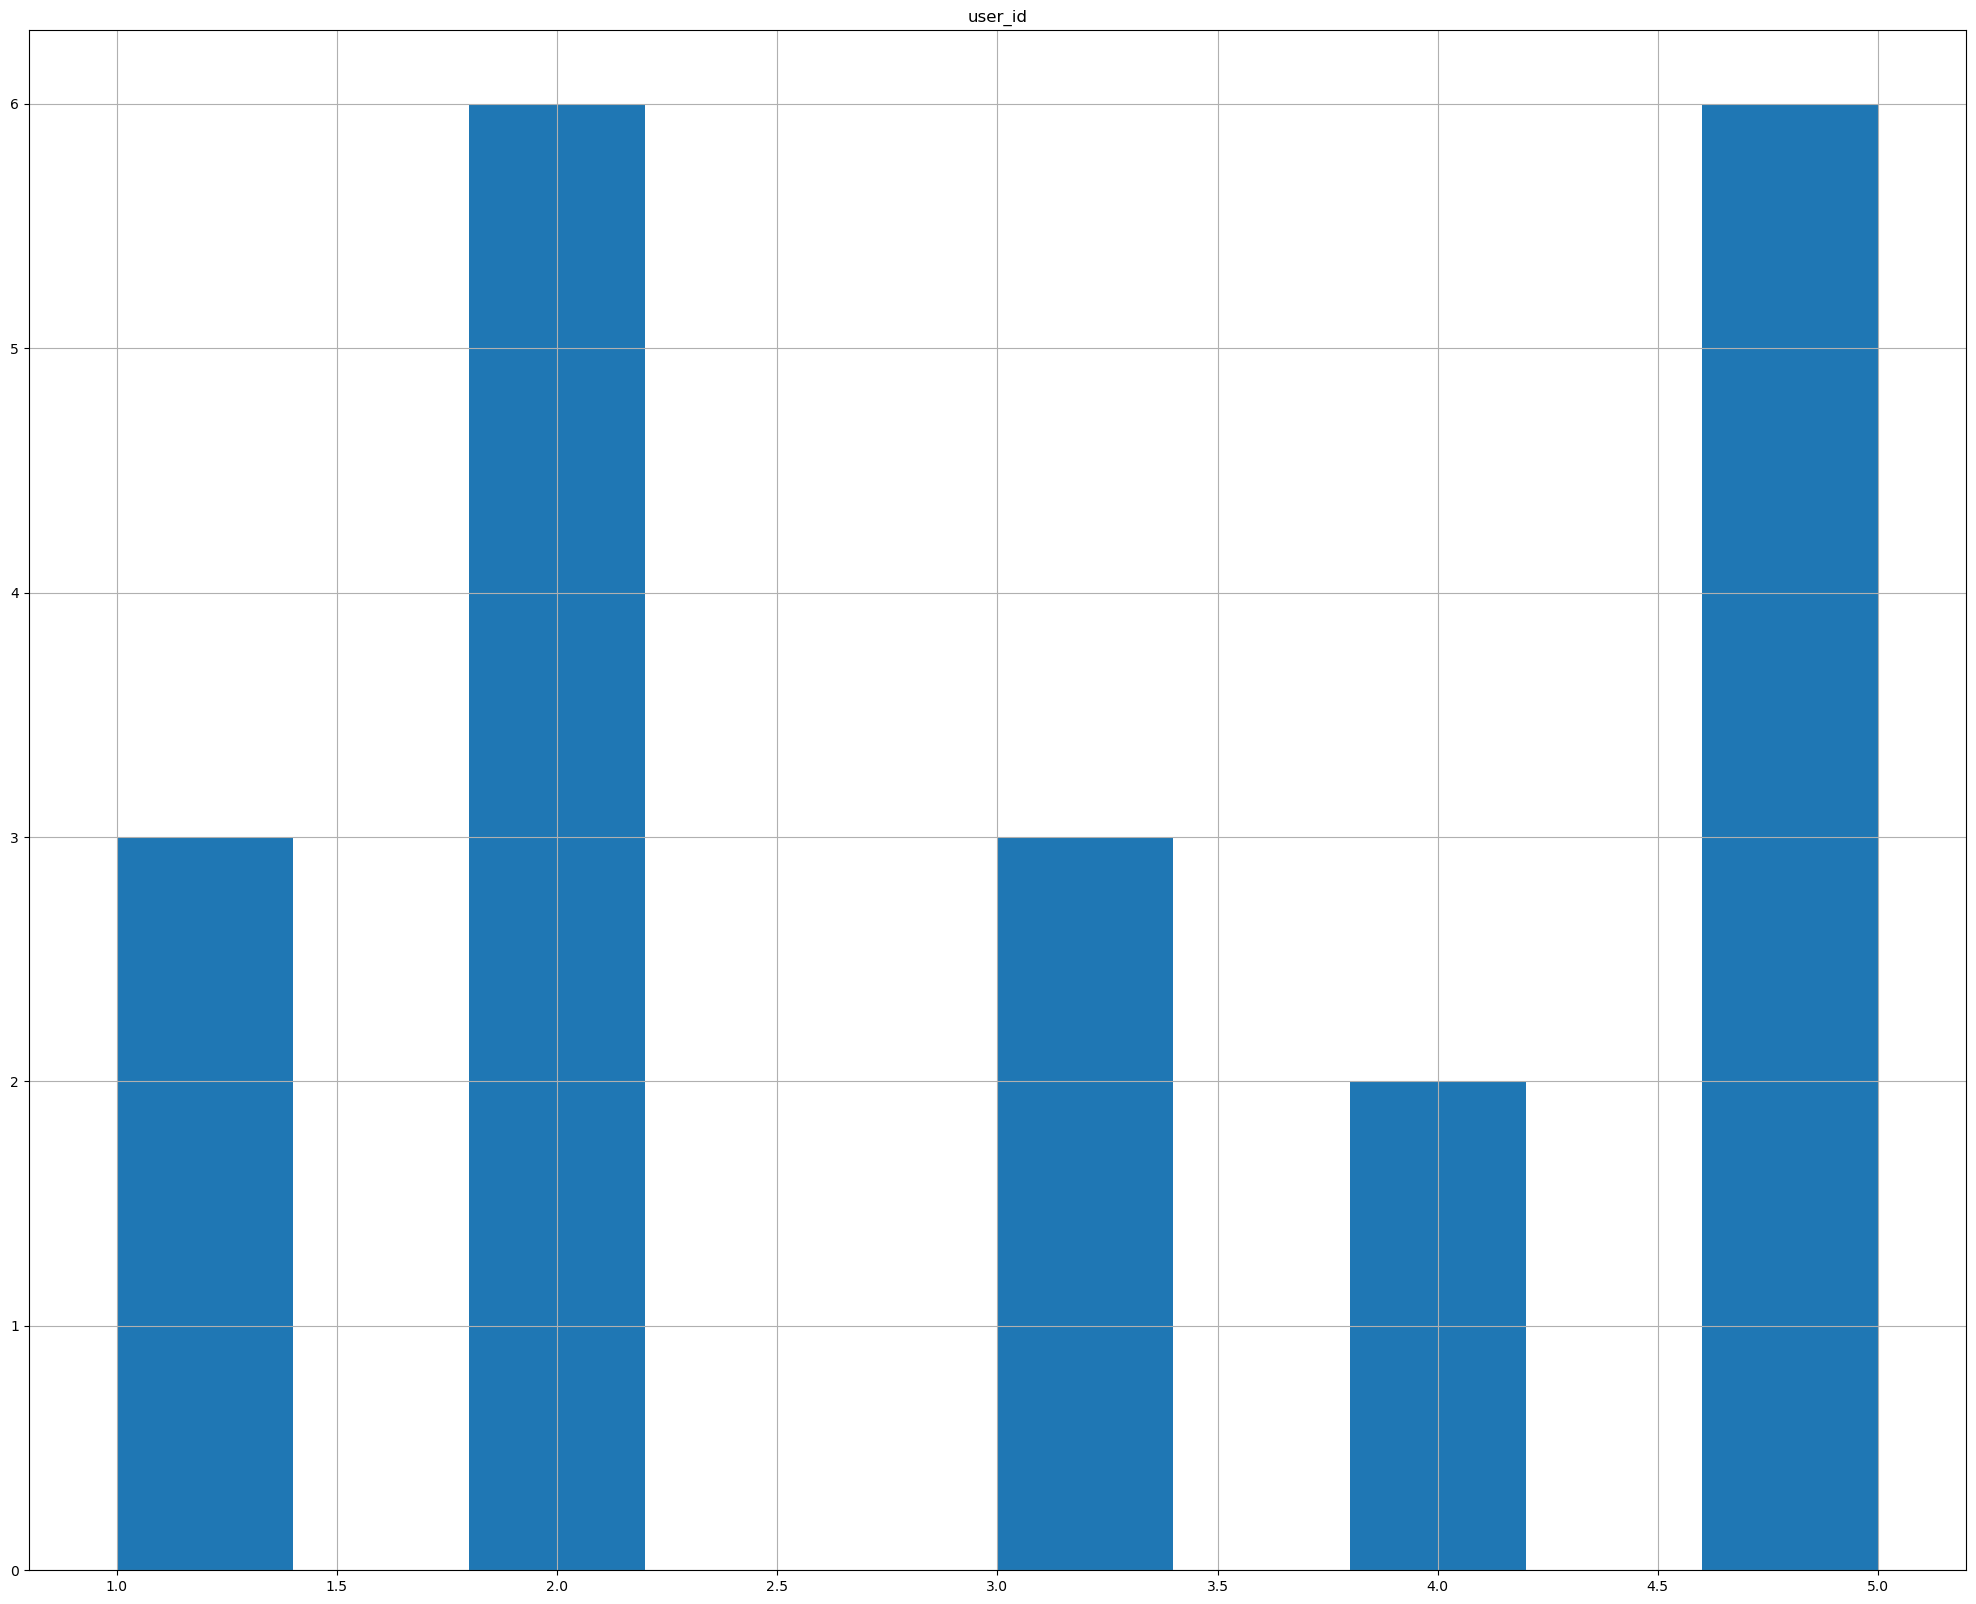

In [9]:
df.hist(figsize=(25,20))
plt.show()

In [10]:
df.columns

Index(['user_id', 'mood', 'genre', 'album', 'artist'], dtype='object')

In [11]:
df['genre'].unique()

array(['indie', 'classical', 'pop', 'rock', 'jazz', 'blues'], dtype=object)

In [13]:
df['mood'].unique()

array(['happy', 'sad', 'relaxed'], dtype=object)

In [14]:


df['mood'] = df['mood'].astype('category').cat.codes  
df['genre'] = df['genre'].astype('category').cat.codes  

In [15]:
df

,user_id,mood,genre,album,artist
0,4,0,2,Blues in the Night,Chopin
1,2,2,1,Symphony No. 5,Sunny Days
2,3,0,4,Live Free,Pop Star
3,5,0,5,Symphony No. 5,The Rainmakers
4,1,2,4,Dance Like Nobody's Watching,The Rainmakers
5,5,1,3,Lost Dreams,Sunny Days
6,2,0,1,Blues in the Night,Pop Star
7,3,2,3,Symphony No. 5,The Freedom Fighters
8,5,2,5,Smooth Jazz Nights,The Rainmakers
9,5,1,1,Nocturnes,The Rainmakers


In [ ]:
#Model training

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
x = df[['mood', 'genre']]
y = df['artist']

In [9]:
# Splitting the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)


In [14]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

In [ ]:
# Predicting the artist based on mood and genre.
def predict_artist(mood, genre):
    new_input = pd.DataFrame({'mood': [mood], 'genre': [genre]})
    predicted_artist = rfc.predict(new_input)
    return predicted_artist[0]

mood_input = 1  
genre_input = 3 

predicted_artist = predict_artist(mood_input, genre_input)
print("Predicted Artist:",predicted_artist)





In [ ]:
# Finding 3 popular albums for the predicted artist.

def get_popular_albums(artist):
    popular_albums = df[df['artist'] == artist]['album'].value_counts().nlargest(3)
    return popular_albums

popular_albums = get_popular_albums(predicted_artist)

if not popular_albums.empty:
    print("Popular albums of the predicted artist:")
    for album, count in popular_albums.items():
        print(f"{album} (Count: {count})")
else:
    print("No albums found for the predicted artist:",predicted_artist)